## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D

from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
#IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

IMAGE_SIZE = [256, 256]
#Give dataset path
train_path = '/content/drive/MyDrive/Tomato/train'
val_path = '/content/drive/MyDrive/Tomato/val'
#test_path = '/content/drive/MyDrive/project/original_v2/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Tomato/train/*')

In [ ]:
# our layers - you can add more if you want
#x = Flatten()(inception.output)

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30, 
  verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
313/313 [==============================] - 2298s 7s/step - loss: 1.4956 - accuracy: 0.5310 - val_loss: 1.1966 - val_accuracy: 0.6360
Epoch 2/30
313/313 [==============================] - 194s 619ms/step - loss: 0.9905 - accuracy: 0.7064 - val_loss: 0.9820 - val_accuracy: 0.6950
Epoch 3/30
313/313 [==============================] - 192s 614ms/step - loss: 0.8476 - accuracy: 0.7466 - val_loss: 0.8935 - val_accuracy: 0.7260
Epoch 4/30
313/313 [==============================] - 193s 616ms/step - loss: 0.7619 - accuracy: 0.7684 - val_loss: 0.8557 - val_accuracy: 0.7150
Epoch 5/30
313/313 [==============================] - 194s 620ms/step - loss: 0.7170 - accuracy: 0.7801 - val_loss: 0.8175 - val_accuracy: 0.7310
Epoch 6/30
313/313 [==============================] - 194s 620ms/step - loss: 0.6730 - accuracy: 0.7949 - val_loss: 0.7712 - val_accuracy: 0.7390
Epoch 7/30
313/313 [==============================] - 193s 617ms/step - loss: 0.6275 - accuracy: 0.8133 - val_loss: 0.7363 - v

In [ ]:
import matplotlib.pyplot as plt

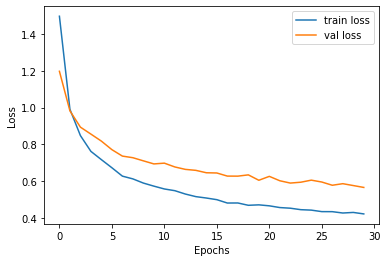

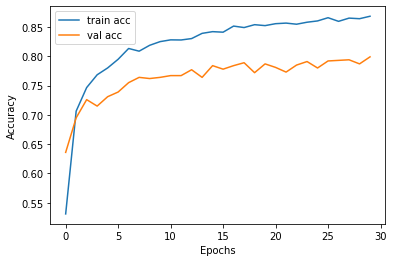

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.8109645e-01, 1.8903527e-02, 3.2149321e-13, 3.6633790e-15],
       [0.0000000e+00, 1.0000000e+00, 6.7508175e-31, 9.6766906e-34],
       [1.0000000e+00, 0.0000000e+00, 5.1786687e-12, 4.6748233e-21],
       [5.8609026e-21, 3.5736174e-38, 1.0000000e+00, 6.6462439e-35],
       [7.0799731e-33, 1.0000000e+00, 2.7118872e-18, 1.2365503e-16],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.6401240e-34],
       [7.8406102e-38, 1.5452786e-03, 0.0000000e+00, 9.9845469e-01],
       [1.1753855e-34, 6.4181074e-30, 2.3469242e-26, 1.0000000e+00],
       [1.6965836e-25, 7.5243352e-23, 1.0000000e+00, 1.5732070e-17],
       [2.4483354e-23, 9.3621990e-09, 2.4969464e-17, 1.0000000e+00],
       [2.9495364e-14, 9.7012167e-14, 1.4914777e-04, 9.9985087e-01],
       [1.0000000e+00, 2.5258806e-23, 2.3514068e-17, 3.6277342e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.6495063e-24, 9.0913505e-33, 1.0000000e+00, 1.4732772e-30],
       [7.5178525e-30, 3.0929136e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 0, 2, 1, 1, 3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 2, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'